
Importing the libraries


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Load and Prepare Data


In [16]:
googleplaystore_data = pd.read_csv("googleplaystore.csv")


In [17]:
googleplaystore_data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [51]:
googleplaystore_data.shape

(10841, 13)

EDA (Use Pandas)

In [18]:
googleplaystore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [61]:
for col in googleplaystore_data.columns:
    print(col,len(googleplaystore_data[col].unique()),googleplaystore_data[col].unique())

App 9660 ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category 34 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
Rating 41 [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]
Reviews 6002 ['159' '967' '87510' ... '603' '1195' 

In [62]:
googleplaystore_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


مهم ترین نتجیه دراین جا

In [20]:
googleplaystore_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [23]:
googleplaystore_data['Type'].value_counts(normalize=True)* 100


Free    92.610701
Paid     7.380074
0        0.009225
Name: Type, dtype: float64

plt.figure(figsize=(40,30),dpi=160)
sns.catplot(x="App", y="Rating", kind="violin", data=googleplaystore_data)
plt.show()

                    چنان که مشاهده می شود در میان داده های موجود در ریتینگ یک داده پرت وجود دارد که بزرگ تر از 5 است که در ادامه بایستی این داده حذف گرددد 

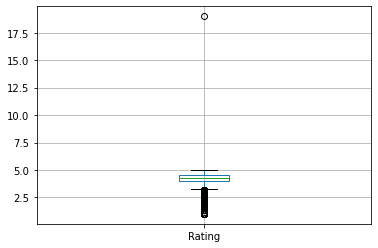

In [79]:
googleplaystore_data.boxplot();

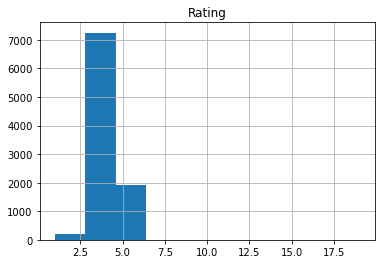

In [78]:
googleplaystore_data.hist();

In [81]:
googleplaystore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [84]:
googleplaystore_data[googleplaystore_data.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [86]:
googleplaystore_data.drop([10472] ,inplace=True)

In [87]:
googleplaystore_data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


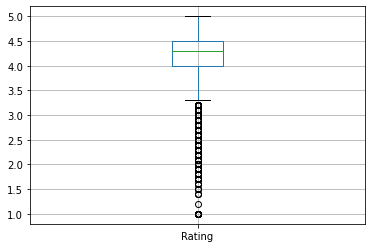

In [88]:
googleplaystore_data.boxplot();

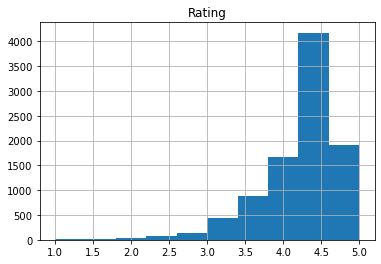

In [89]:
googleplaystore_data.hist();

In [90]:
thresh1=len(googleplaystore_data)*0.1
thresh1

1084.0

In [93]:
googleplaystore_data.dropna(thresh=thresh1,axis=1,inplace=True)

In [94]:
print(googleplaystore_data.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [99]:
googleplaystore_data['Rating'].fillna((googleplaystore_data['Rating'].mean()), inplace=True)

In [100]:
print(googleplaystore_data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64


In [104]:
print(googleplaystore_data['Type'].mode())
print(googleplaystore_data['Current Ver'].mode())
print(googleplaystore_data['Android Ver'].mode())


0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [103]:
print(googleplaystore_data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64


In [105]:
googleplaystore_data['Type'].fillna(str(googleplaystore_data['Type'].mode().values[0]) ,inplace=True)
googleplaystore_data['Current Ver'].fillna(str(googleplaystore_data['Current Ver'].mode().values[0]) ,inplace=True)
googleplaystore_data['Android Ver'].fillna(str(googleplaystore_data['Android Ver'].mode().values[0]) ,inplace=True)

In [106]:
print(googleplaystore_data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [110]:
googleplaystore_data['Price']=googleplaystore_data['Price'].apply((lambda x : str(x).replace('$','') if '$' in str(x) else str(x) ))
googleplaystore_data['Price']=googleplaystore_data['Price'].apply((lambda x :float(x)))
googleplaystore_data['Reviews']=pd.to_numeric(googleplaystore_data['Reviews'],errors='coerce')
googleplaystore_data['Installs']=googleplaystore_data['Installs'].apply((lambda x : str(x).replace('+','') if '+' in str(x) else str(x) ))
googleplaystore_data['Installs']=googleplaystore_data['Installs'].apply((lambda x : str(x).replace(',','') if ',' in str(x) else str(x) ))
googleplaystore_data['Installs']=googleplaystore_data['Installs'].apply((lambda x :float(x)))

In [111]:
googleplaystore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [112]:
googleplaystore_data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [121]:
grp=googleplaystore_data.groupby('Category')
x=grp['Installs'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

                                                                               چنان که مشاهده میشودبیش ترین نصب مروبوط به داده های ارتباطی است   

C:\Users\Asus\AppData\Local\Temp/ipykernel_16600/3253357835.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,'ro',color='b')


Text(0, 0.5, 'inistals--->')

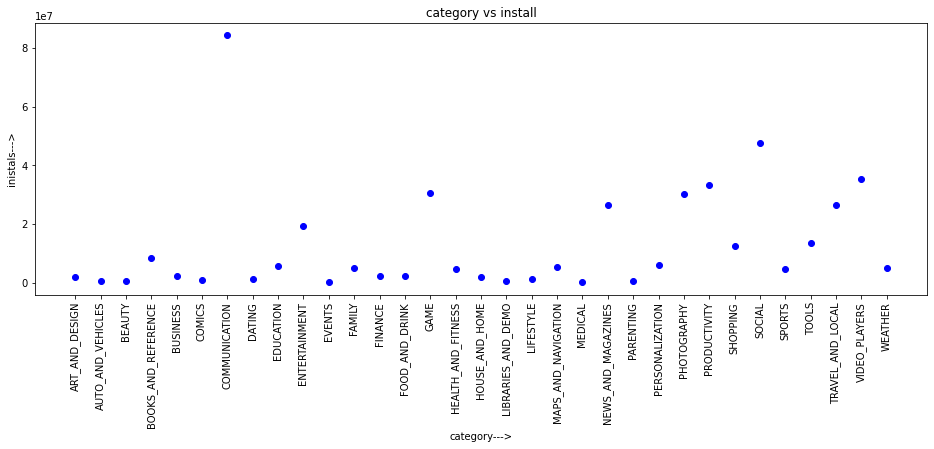

In [129]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro',color='b')
plt.xticks(rotation=90)
plt.title('category vs install')
plt.xlabel('category--->')
plt.ylabel('inistals--->')

C:\Users\Asus\AppData\Local\Temp/ipykernel_16600/4115707324.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,'r--',color='r')


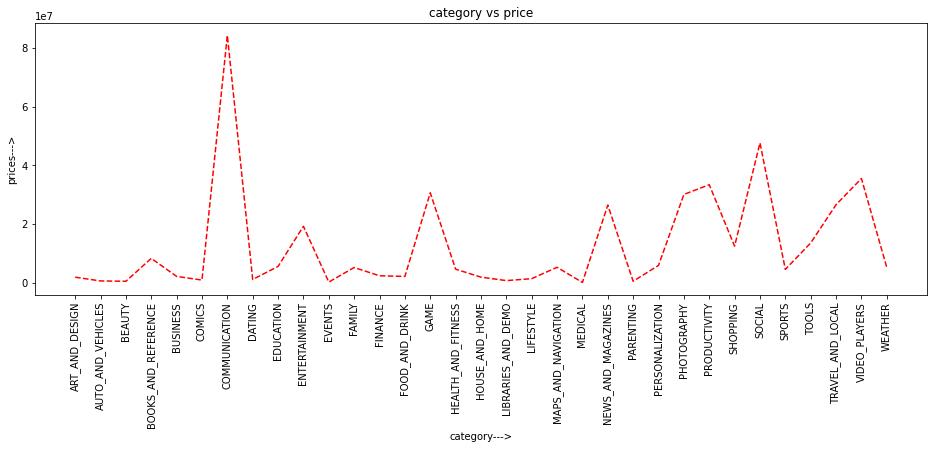

In [130]:
plt.figure(figsize=(16,5))
plt.plot(x,'r--',color='r')
plt.xticks(rotation=90)
plt.title('category vs price')
plt.xlabel('category--->')
plt.ylabel('prices--->')
plt.show()

C:\Users\Asus\AppData\Local\Temp/ipykernel_16600/2536013024.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g^" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x,'g^',color='g')


Text(0, 0.5, 'reviews--->')

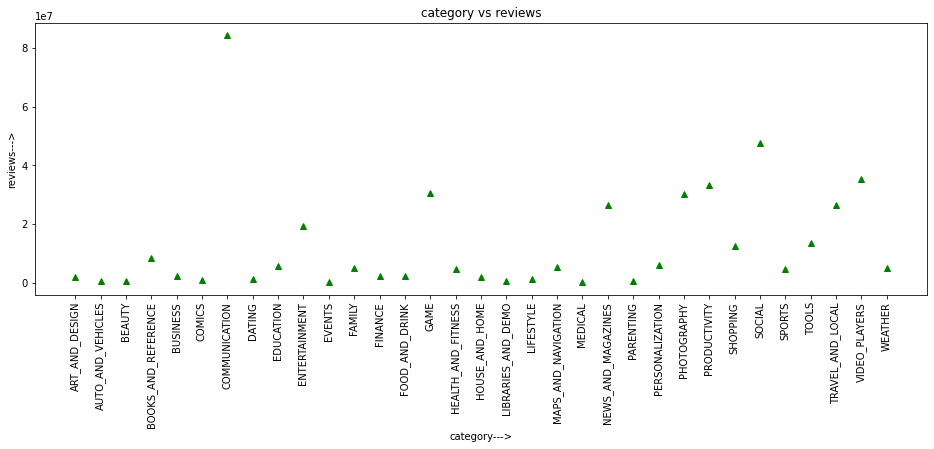

In [131]:
plt.figure(figsize=(16,5))
plt.plot(x,'g^',color='g')
plt.xticks(rotation=90)
plt.title('category vs reviews')
plt.xlabel('category--->')
plt.ylabel('reviews--->')

<AxesSubplot:>

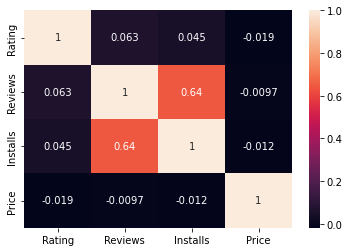

In [132]:
my_correlation = googleplaystore_data.corr()
sns.heatmap(my_correlation,annot=True)